In [1]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
import base64
import urllib.parse
#from wordcloud import WordCloud, STOPWORDS

In [2]:
df_q1 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_03_05.csv.gz")
df_q1

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250305023340,2025-03-11,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.26
1,30320,https://www.airbnb.com/rooms/30320,20250305023340,2025-03-10,previous scrape,Great Vacational Apartments,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.96
2,30959,https://www.airbnb.com/rooms/30959,20250305023340,2025-03-10,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.07
3,40916,https://www.airbnb.com/rooms/40916,20250305023340,2025-03-10,previous scrape,Holiday Apartment Madrid Center,NaN,NaN,https://a0.muscache.com/pictures/336736/c3b486...,130907,...,4.79,4.88,4.55,NaN,f,3,3,0,0,0.28
4,62423,https://www.airbnb.com/rooms/62423,20250305023340,2025-03-12,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.85,4.97,4.58,NaN,f,3,1,2,0,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,https://www.airbnb.com/rooms/1368985680426539467,20250305023340,2025-03-12,city scrape,Acogedor y nuevo ático con gran terraza (B),"Cozy penthouse floor with large terrace, locat...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,20803102,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN
25284,1368986418960986344,https://www.airbnb.com/rooms/1368986418960986344,20250305023340,2025-03-05,city scrape,Elegante apartamento en Madrid!,Have fun with the whole family at this stylish...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25285,1368991577357063431,https://www.airbnb.com/rooms/1368991577357063431,20250305023340,2025-03-10,city scrape,Tropical apartment Madrid,Get away from routine at this unique and relax...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,52530675,...,NaN,NaN,NaN,NaN,f,45,45,0,0,NaN
25286,1369034696848967860,https://www.airbnb.com/rooms/1369034696848967860,20250305023340,2025-03-07,city scrape,"Cama 1 de 04, no es hinchable.",Enjoy the comfort and tranquility of this home.,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,543251626,...,NaN,NaN,NaN,NaN,f,4,0,0,4,NaN


In [3]:
df_q1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [4]:
cols_keep = [
    "id",
    "last_scraped",
    "neighbourhood_group_cleansed",
    "neighbourhood_cleansed",
    "latitude",
    "longitude",
    "room_type",
    "property_type",
    "accommodates",
    "bedrooms",
    "bathrooms_text",
    "price",
    "minimum_nights",
    "availability_365",
    "number_of_reviews"
]

In [5]:
df_q1_15cols = df_q1[cols_keep].copy()
df_q1_15cols = df_q1_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q1_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25283,1368985680426539467,2025-03-12,Hortaleza,Canillas,40.464110,-3.647130,Entire home/apt,Entire rental unit,3,1.0,1 bath,$103.00,2,0,0
25284,1368986418960986344,2025-03-05,Carabanchel,San Isidro,40.395983,-3.730953,Entire home/apt,Entire rental unit,5,2.0,1 bath,$100.00,5,365,0
25285,1368991577357063431,2025-03-10,Carabanchel,San Isidro,40.395621,-3.731533,Entire home/apt,Entire rental unit,3,1.0,1 bath,$66.00,5,3,0
25286,1369034696848967860,2025-03-07,Carabanchel,Abrantes,40.383990,-3.727290,Shared room,Shared room in rental unit,1,1.0,1 shared bath,$16.00,1,71,0


In [6]:
df_q2 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_06_12.csv.gz")

In [7]:
df_q2_15cols = df_q2[cols_keep].copy()
df_q2_15cols = df_q2_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q2_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-06-26,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,340,33
1,30320,2025-06-27,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,337,172
2,30959,2025-06-27,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-06-26,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,352,49
4,62423,2025-06-25,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$64.00,1,314,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25999,1440480926395443476,2025-06-25,Arganzuela,Acacias,40.400235,-3.701100,Private room,Private room in rental unit,2,1.0,1 private bath,$30.00,2,64,0
26000,1440487269977127830,2025-06-27,Retiro,Niño Jesús,40.410924,-3.675724,Entire home/apt,Entire rental unit,6,3.0,2 baths,$140.00,31,300,0
26001,1440501514773966682,2025-06-26,Centro,Sol,40.414901,-3.706317,Entire home/apt,Entire rental unit,3,1.0,1 bath,$77.00,1,349,0
26002,1440526432592438393,2025-06-27,Centro,Embajadores,40.410300,-3.703420,Entire home/apt,Entire rental unit,2,1.0,1 bath,$47.00,30,348,0


In [8]:
df_q3 = pd.read_csv("./Datos_Naza/Airbnb_2025/listings_2025_09_14.csv.gz")


In [9]:
df_q3_15cols = df_q3[cols_keep].copy()
df_q3_15cols = df_q3_15cols.rename(columns={
    "neighbourhood_group_cleansed": "Distrito",
    "neighbourhood_cleansed": "Barrio",
    "accommodates": "capacidad",})
df_q3_15cols

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-09-15,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,NaN,1 bath,NaN,4,198,33
1,30320,2025-09-15,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,$157.00,5,342,173
2,30959,2025-09-15,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-09-15,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,2,1.0,1 bath,$143.00,5,341,53
4,62423,2025-09-15,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$65.00,1,299,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1508016618526988093,2025-09-14,Retiro,Pacífico,40.401080,-3.676530,Entire home/apt,Entire rental unit,4,1.0,1 bath,$89.00,1,324,0
24996,1508029370917448986,2025-09-15,Centro,Palacio,40.411513,-3.713762,Entire home/apt,Entire rental unit,4,1.0,1 bath,$140.00,4,283,0
24997,1508295390166110966,2025-09-15,Centro,Palacio,40.420770,-3.709950,Entire home/apt,Entire rental unit,4,1.0,1 bath,$150.00,2,362,0
24998,1508573408483646673,2025-09-14,Retiro,Ibiza,40.420882,-3.675472,Entire home/apt,Entire rental unit,2,1.0,1 bath,$38.00,32,364,0


In [10]:
df_all = pd.concat([df_q1_15cols, df_q2_15cols, df_q3_15cols], ignore_index=True)
df_all

,id,last_scraped,Distrito,Barrio,latitude,longitude,room_type,property_type,capacidad,bedrooms,bathrooms_text,price,minimum_nights,availability_365,number_of_reviews
0,21853,2025-03-11,Latina,Cármenes,40.403810,-3.741300,Private room,Private room in rental unit,1,1.0,1 bath,$29.00,4,233,33
1,30320,2025-03-10,Centro,Sol,40.414760,-3.704180,Entire home/apt,Entire rental unit,2,1.0,1 bath,NaN,5,0,172
2,30959,2025-03-10,Centro,Embajadores,40.412590,-3.701050,Entire home/apt,Entire loft,2,1.0,1 bath,NaN,3,0,8
3,40916,2025-03-10,Centro,Universidad,40.422470,-3.705770,Entire home/apt,Entire rental unit,3,1.0,1 bath,NaN,5,0,49
4,62423,2025-03-12,Centro,Justicia,40.418840,-3.696550,Private room,Private room in rental unit,4,1.0,1.5 shared baths,$77.00,1,298,227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76287,1508016618526988093,2025-09-14,Retiro,Pacífico,40.401080,-3.676530,Entire home/apt,Entire rental unit,4,1.0,1 bath,$89.00,1,324,0
76288,1508029370917448986,2025-09-15,Centro,Palacio,40.411513,-3.713762,Entire home/apt,Entire rental unit,4,1.0,1 bath,$140.00,4,283,0
76289,1508295390166110966,2025-09-15,Centro,Palacio,40.420770,-3.709950,Entire home/apt,Entire rental unit,4,1.0,1 bath,$150.00,2,362,0
76290,1508573408483646673,2025-09-14,Retiro,Ibiza,40.420882,-3.675472,Entire home/apt,Entire rental unit,2,1.0,1 bath,$38.00,32,364,0


In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76292 entries, 0 to 76291
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76292 non-null  int64  
 1   last_scraped       76292 non-null  object 
 2   Distrito           76292 non-null  object 
 3   Barrio             76292 non-null  object 
 4   latitude           76292 non-null  float64
 5   longitude          76292 non-null  float64
 6   room_type          76292 non-null  object 
 7   property_type      76292 non-null  object 
 8   capacidad          76292 non-null  int64  
 9   bedrooms           68775 non-null  float64
 10  bathrooms_text     76209 non-null  object 
 11  price              58307 non-null  object 
 12  minimum_nights     76292 non-null  int64  
 13  availability_365   76292 non-null  int64  
 14  number_of_reviews  76292 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 8.7+ MB


In [12]:
df_all2 = df_all.copy()

df_all2["last_scraped"] = pd.to_datetime(df_all2["last_scraped"], errors="coerce")

df_all2 = (df_all2.sort_values("last_scraped").drop_duplicates(subset=["id"], keep="last").reset_index(drop=True))

df_all2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31231 entries, 0 to 31230
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 31231 non-null  int64         
 1   last_scraped       31231 non-null  datetime64[ns]
 2   Distrito           31231 non-null  object        
 3   Barrio             31231 non-null  object        
 4   latitude           31231 non-null  float64       
 5   longitude          31231 non-null  float64       
 6   room_type          31231 non-null  object        
 7   property_type      31231 non-null  object        
 8   capacidad          31231 non-null  int64         
 9   bedrooms           28286 non-null  float64       
 10  bathrooms_text     31194 non-null  object        
 11  price              24062 non-null  object        
 12  minimum_nights     31231 non-null  int64         
 13  availability_365   31231 non-null  int64         
 14  number

#### Distribución espacial por tipo de alojamiento (Madrid)

**Objetivo:** visualizar cómo se distribuyen los anuncios según `room_type` usando latitud y longitud.

In [22]:
def plot_room_type_map(df, title="Room type por coordenadas (Madrid)"):
    
    df_plot = df.dropna(subset=["latitude", "longitude", "room_type"]).copy()

    plt.figure(figsize=(8, 7))

    for room, group in df_plot.groupby("room_type"):
        plt.scatter(group["longitude"], group["latitude"], s=10, alpha=0.35, label=room)

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True, alpha=0.2)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.legend(title="Room_type", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

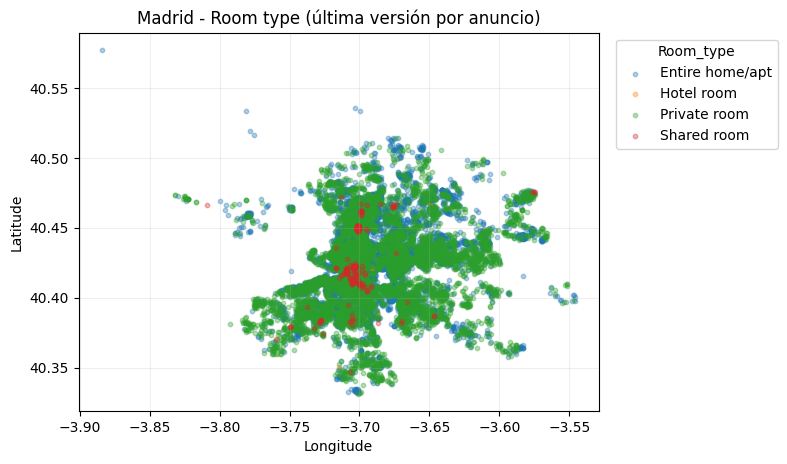

In [23]:
plot_room_type_map(df_all2, title="Madrid - Room type (última versión por anuncio)")

Este gráfico representa la distribución espacial de los anuncios de Airbnb en Madrid, usando longitud y latitud, y diferenciando cada punto por room_type. Se aprecia una concentración muy marcada en el área central, lo que indica que la oferta está fuertemente agrupada en determinados barrios y se vuelve más dispersa conforme nos alejamos del centro. En cuanto al tipo de alojamiento, predominan los anuncios de “Private room” y “Entire home/apt”, mientras que “Shared room” y “Hotel room” tienen una presencia claramente menor y aparecen de forma más puntual. En conjunto, el patrón sugiere que la oferta de Airbnb en Madrid no está uniformemente repartida y que el centro actúa como principal polo de concentración.

Con el fin de hacer la visualización más legible, se ha dividido el mapa en cuatro subgráficos, uno por cada tipo de alojamiento (room_type). En un único gráfico, la superposición de miles de puntos dificulta distinguir patrones; en cambio, al separarlos se observa con mucha más claridad dónde se concentra cada categoría y cómo se distribuye por la ciudad. Esto permite comparar de forma directa las diferencias espaciales entre tipos de alojamiento sin que unos puntos oculten a otros.

In [27]:
def subplots_room_type_same_colors(df, title="Madrid - Distribución por tipo de habitación"):
    df_plot = df.dropna(subset=["latitude", "longitude", "room_type"]).copy()

    color_map = {
        "Entire home/apt": "C0",
        "Hotel room": "C1",
        "Private room": "C2",
        "Shared room": "C3"
    }

    room_order = ["Entire home/apt", "Hotel room", "Private room", "Shared room"]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    x_min, x_max = df_plot["longitude"].min(), df_plot["longitude"].max()
    y_min, y_max = df_plot["latitude"].min(), df_plot["latitude"].max()

    for ax, rt in zip(axes, room_order):
        g = df_plot[df_plot["room_type"] == rt]
        ax.scatter(g["longitude"], g["latitude"], s=10, alpha=0.35, color=color_map[rt])
        ax.set_title(rt)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.grid(True, alpha=0.2)
        ax.set_aspect("equal", adjustable="box")

    fig.suptitle(title, fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

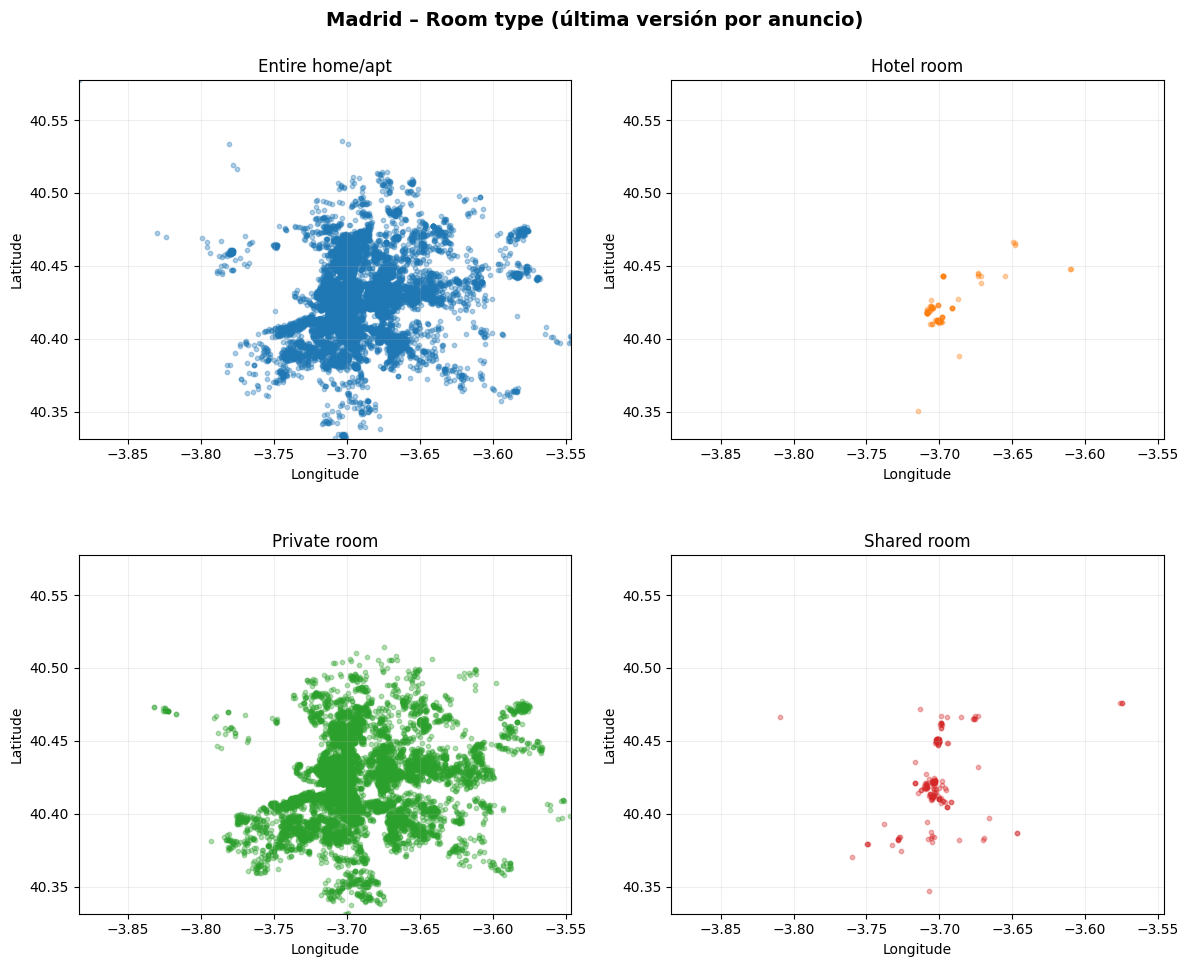

In [ ]:
subplots_room_type_same_colors(df_all2, title="Madrid - Room type (última versión por anuncio)")

Los cuatro subplots muestran la distribución geográfica de los anuncios en Madrid separada por tipo de alojamiento (room_type), lo que permite comparar patrones sin solapamiento. Se observa que “Entire home/apt” y “Private room” concentran la gran mayoría de anuncios y reproducen un patrón muy similar: alta densidad en el área central y dispersión hacia zonas periféricas. En cambio, “Hotel room” y “Shared room” aparecen con muchísima menor frecuencia y con una presencia más puntual, concentrada en áreas específicas. En conjunto, la separación por subgráficos facilita ver qué categorías dominan la oferta y cómo varía su distribución espacial dentro de la ciudad.

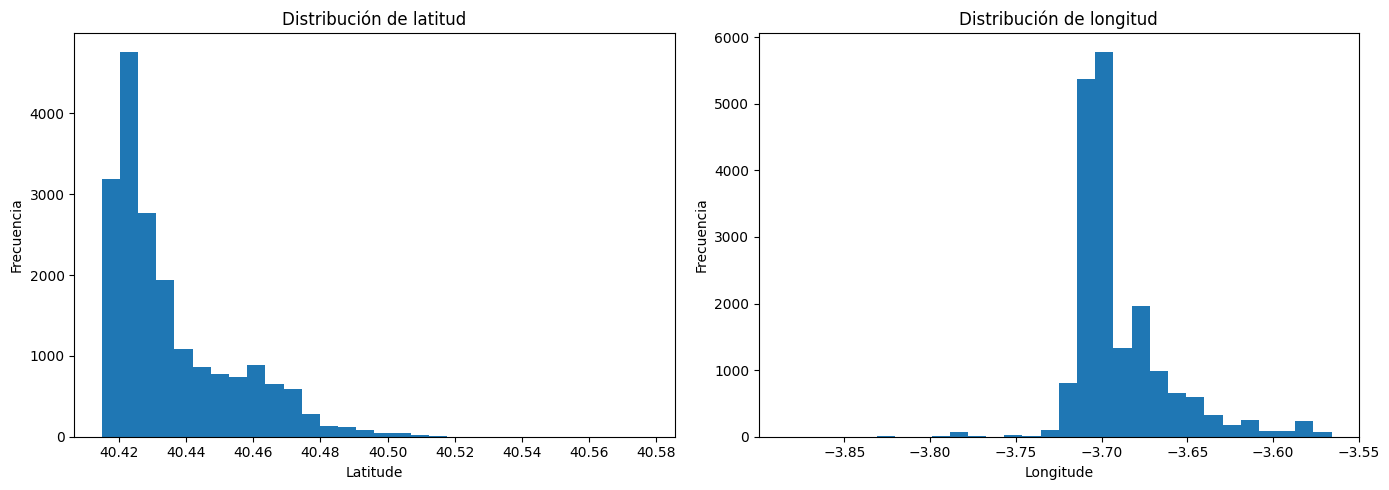

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

ax[0].hist(lat_long["latitude"], bins=30)
ax[0].set_title("Distribución de latitud")
ax[0].set_xlabel("Latitude")
ax[0].set_ylabel("Frecuencia")

ax[1].hist(lat_long["longitude"], bins=30)
ax[1].set_title("Distribución de longitud")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Estos dos histogramas muestran la distribución de las coordenadas geográficas de los anuncios: latitud (eje Norte–Sur) y longitud (eje Este–Oeste). En Madrid, la latitud suele estar alrededor de 40.x (porque la ciudad está al norte del ecuador). Cuanto mayor es la latitud, más al norte se encuentra el punto; cuanto menor, más al sur. La longitud en Madrid es normalmente negativa (≈ −3.x) porque está al oeste del meridiano de Greenwich: valores más negativos indican más hacia el oeste, y valores menos negativos (más cercanos a 0) indican más hacia el este.
En ambos gráficos se observa una concentración clara de anuncios en los rangos centrales (aprox. latitudes ~40.41–40.44 y longitudes alrededor de ~−3.70), lo que sugiere que la mayoría de alojamientos se ubican en el área urbana más densa. A la vez, aparecen colas con menos frecuencia hacia latitudes y longitudes más extremas, que pueden corresponder a zonas periféricas o a posibles outliers.

In [34]:
df_geo = df_all2.dropna(subset=["latitude", "longitude"]).copy()

cols_show = ["id", "Distrito", "Barrio", "room_type", "latitude", "longitude"]

# 10 más al norte (latitud más alta)
north = df_geo.sort_values("latitude", ascending=False).head(10)[cols_show]

# 10 más al sur (latitud más baja)
south = df_geo.sort_values("latitude", ascending=True).head(10)[cols_show]

# 10 más al oeste (longitud más negativa)
west = df_geo.sort_values("longitude", ascending=True).head(10)[cols_show]

# 10 más al este (longitud menos negativa / más cercana a 0)
east = df_geo.sort_values("longitude", ascending=False).head(10)[cols_show]

print(" 10 más al norte:")
display(north)

print("10 más al sur:")
display(south)

print("10 más al oeste:")
display(west)

print("10 más al este:")
display(east)

 10 más al norte:


,id,Distrito,Barrio,room_type,latitude,longitude
2300,1329887400779445183,Fuencarral - El Pardo,El Pardo,Entire home/apt,40.577290,-3.883990
14159,40592877,Fuencarral - El Pardo,El Goloso,Entire home/apt,40.535530,-3.703050
5899,1106476367797671880,Fuencarral - El Pardo,El Goloso,Entire home/apt,40.533302,-3.699520
6886,904222987603914009,Fuencarral - El Pardo,El Pardo,Entire home/apt,40.533240,-3.780890
29760,35195487,Fuencarral - El Pardo,El Pardo,Entire home/apt,40.519260,-3.778120
9268,861667497809720041,Fuencarral - El Pardo,El Pardo,Entire home/apt,40.516373,-3.775174
13207,1293541605284114874,Fuencarral - El Pardo,El Goloso,Entire home/apt,40.514480,-3.675710
11540,1438242130519970357,Fuencarral - El Pardo,Valverde,Entire home/apt,40.514450,-3.672570
13594,15206279,Fuencarral - El Pardo,Valverde,Private room,40.514170,-3.674190
11542,1438302182182287999,Fuencarral - El Pardo,El Goloso,Entire home/apt,40.513980,-3.679330


10 más al sur:


,id,Distrito,Barrio,room_type,latitude,longitude
9280,866574943133089853,Villaverde,San Andrés,Private room,40.331400,-3.701200
7023,928690923268356269,Villaverde,San Andrés,Private room,40.331440,-3.699860
11756,1201507260999977290,Villaverde,San Andrés,Entire home/apt,40.331890,-3.701580
10631,1370202422180452072,Villaverde,San Andrés,Entire home/apt,40.331938,-3.700408
17864,21456431,Villaverde,San Andrés,Entire home/apt,40.332210,-3.708250
6242,980577037134610950,Villaverde,San Andrés,Private room,40.332217,-3.699272
18372,1194343513975476449,Villaverde,San Andrés,Entire home/apt,40.332750,-3.701020
12902,1339805507342464004,Villaverde,San Andrés,Entire home/apt,40.332868,-3.701695
11904,1252661972362769468,Villaverde,San Andrés,Entire home/apt,40.332967,-3.701419
21984,1408539535484271340,Villaverde,San Andrés,Entire home/apt,40.333140,-3.703340


10 más al oeste:


,id,Distrito,Barrio,room_type,latitude,longitude
2300,1329887400779445183,Fuencarral - El Pardo,El Pardo,Entire home/apt,40.577290,-3.883990
13538,5049512,Moncloa - Aravaca,El Plantío,Private room,40.473270,-3.832060
12747,1346230708210195821,Moncloa - Aravaca,El Plantío,Private room,40.473270,-3.832060
10173,1411420436862733845,Moncloa - Aravaca,El Plantío,Entire home/apt,40.472750,-3.829970
13105,1257831512445941650,Moncloa - Aravaca,El Plantío,Private room,40.470297,-3.826120
2266,1264300220494636033,Moncloa - Aravaca,El Plantío,Private room,40.472384,-3.825860
13092,1257871404785020072,Moncloa - Aravaca,El Plantío,Private room,40.472360,-3.825020
2415,1257859395008377740,Moncloa - Aravaca,El Plantío,Private room,40.470523,-3.824979
11297,1429484032415218570,Moncloa - Aravaca,El Plantío,Private room,40.471180,-3.824530
3205,1257866753834915426,Moncloa - Aravaca,El Plantío,Private room,40.472224,-3.824499


10 más al este:


,id,Distrito,Barrio,room_type,latitude,longitude
8956,831481759219689225,Vicálvaro,Casco Histórico de Vicálvaro,Entire home/apt,40.400691,-3.545904
11838,1245501697098445417,Vicálvaro,Casco Histórico de Vicálvaro,Entire home/apt,40.397800,-3.546070
18900,1441987926833969465,Vicálvaro,Casco Histórico de Vicálvaro,Entire home/apt,40.401730,-3.546240
10903,1460809258673241664,Vicálvaro,Casco Histórico de Vicálvaro,Private room,40.398570,-3.546900
8957,831513177783787958,Vicálvaro,Casco Histórico de Vicálvaro,Entire home/apt,40.401623,-3.547164
12006,1236848416537102887,Vicálvaro,Casco Histórico de Vicálvaro,Entire home/apt,40.397400,-3.547680
1370,1156426430788545810,Vicálvaro,Casco Histórico de Vicálvaro,Private room,40.408447,-3.551198
12661,1305648081330896331,Vicálvaro,Casco Histórico de Vicálvaro,Private room,40.409421,-3.551534
3429,1292853651115383014,Vicálvaro,Casco Histórico de Vicálvaro,Private room,40.409630,-3.551690
15301,1259167583052539744,Vicálvaro,Casco Histórico de Vicálvaro,Private room,40.396789,-3.552519


No parecen errores raros: los extremos cuadran con distritos/barrios periféricos reales de Madrid. Así que, de momento, no hay señales claras de outliers “fuera de Madrid”.

#### Concentración de la oferta de alojamientos turísticos (Madrid)

**Objetivo:** ver cuantos anuncios hay por distrito y por barrio y que % representan del total

In [35]:
df_base = df_all2.dropna(subset=["Distrito", "Barrio"]).copy()

# 2) Crear flag de "activo" (opcional, pero útil)
df_base["is_active"] = df_base["availability_365"].fillna(0).astype(float) > 0

total_listings = len(df_base)
total_active = df_base["is_active"].sum()

print("Total anuncios:", total_listings)
print("Total activos:", total_active)


Total anuncios: 31231
Total activos: 25101


In [36]:
by_district = (
    df_base
    .groupby("Distrito")
    .agg(
        n_listings=("id", "count"),
        n_active=("is_active", "sum")
    )
    .reset_index()
)

by_district["pct_listings"] = by_district["n_listings"] / total_listings * 100
by_district["pct_active"] = by_district["n_active"] / total_active * 100

by_district = by_district.sort_values("n_listings", ascending=False)

by_district.head(15)

,Distrito,n_listings,n_active,pct_listings,pct_active
3,Centro,12718,10436,40.722359,41.576033
14,Salamanca,2065,1655,6.612020,6.593363
16,Tetuán,2051,1728,6.567193,6.884188
5,Chamberí,2022,1609,6.474336,6.410103
0,Arganzuela,1626,1247,5.206365,4.967930
2,Carabanchel,1169,953,3.743076,3.796661
13,Retiro,1151,914,3.685441,3.641289
4,Chamartín,1085,848,3.474112,3.378351
6,Ciudad Lineal,1062,832,3.400467,3.314609
12,Puente de Vallecas,998,777,3.195543,3.095494


La tabla por distrito muestra una concentración muy marcada de anuncios en Centro, que acumula aproximadamente 4 de cada 10 anuncios del dataset (≈40% del total) y una proporción similar de anuncios activos (≈41%). A partir de ahí, la oferta se reparte entre varios distritos con pesos mucho menores: Salamanca, Tetuán y Chamberí aparecen como los siguientes con más anuncios, pero cada uno representa alrededor de 6–7% del total. El resto de distritos (Arganzuela, Carabanchel, Retiro, Chamartín, Ciudad Lineal, Puente de Vallecas, etc.) presentan porcentajes más bajos, lo que refuerza la idea de que la oferta de Airbnb está muy centralizada en zonas céntricas y en distritos próximos al centro.

In [37]:
by_neigh = (
    df_base
    .groupby(["Distrito", "Barrio"])
    .agg(
        n_listings=("id", "count"),
        n_active=("is_active", "sum")
    )
    .reset_index()
)

by_neigh["pct_listings"] = by_neigh["n_listings"] / total_listings * 100
by_neigh["pct_active"] = by_neigh["n_active"] / total_active * 100

by_neigh = by_neigh.sort_values("n_listings", ascending=False)

by_neigh.head(20)

,Distrito,Barrio,n_listings,n_active,pct_listings,pct_active
20,Centro,Embajadores,3375,2713,10.806570,10.808334
24,Centro,Universidad,2687,2160,8.603631,8.605235
22,Centro,Palacio,2254,1869,7.217188,7.445918
23,Centro,Sol,1650,1427,5.283212,5.685032
21,Centro,Justicia,1470,1182,4.706862,4.708976
19,Centro,Cortes,1282,1085,4.104896,4.322537
35,Chamberí,Trafalgar,594,479,1.901956,1.908291
110,Tetuán,Cuatro Caminos,560,477,1.793090,1.900323
6,Arganzuela,Palos de Moguer,529,416,1.693830,1.657304
94,Salamanca,Goya,498,392,1.594569,1.561691


Al desagregar por barrio se observa aún mejor el patrón de concentración: los barrios con más anuncios pertenecen mayoritariamente al distrito Centro, destacando Embajadores, Universidad, Palacio, Sol, Justicia y Cortes, que lideran tanto en número total de anuncios como en anuncios activos. Por ejemplo, Embajadores por sí solo supone una parte relevante del total (≈11%), seguido de Universidad y Palacio, lo que indica que dentro del distrito Centro la oferta también se concentra en barrios concretos. Fuera del Centro aparecen barrios como Trafalgar (Chamberí), Cuatro Caminos (Tetuán), Palos de Moguer (Arganzuela) o Goya (Salamanca), pero con porcentajes mucho menores. En conjunto, esta tabla confirma que la oferta se organiza en “hotspots” muy definidos, lo que es clave para futuras comparaciones con variables externas (por ejemplo, precio €/m²) o para analizar diferencias de tipo de alojamiento por zona.